In [9]:
!pip install census

In [2]:
import os
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import numpy as np
import json 
import requests
import pprint as pp
from config import census_api_key 
from config import bls_api_key
import scipy.stats as sts
#from us import states
from census import Census
from scipy.stats import linregress

In [3]:
#2011 Census Data
year=2011

c = Census(census_api_key, year)

census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                          "B19301_001E",
                          "B17001_002E", "B23025_005E"), {'for': 'place:*'})
census_data=pd.DataFrame(census_data)

census_pd=census_data.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count", 
                                      "state" : "State ID",
                                      "NAME": "City", 
                                      "place": "Place ID"})
year = {"Year":[2011]}
year_range = pd.DataFrame(year)
census_pd['Year'] = year_range
census_pd = census_pd.fillna('2011')

city_data_2011 = census_pd.loc[(census_pd["City"]=="Charlotte city, North Carolina") |
                         (census_pd["City"]=="San Francisco city, California")]

city_data_2011

,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID,Year
3255,"San Francisco city, California",72947.0,797983.0,46777,96801.0,36368.0,06,67000,2011
18265,"Charlotte city, North Carolina",53146.0,722234.0,31667,106321.0,40293.0,37,12000,2011


In [4]:
#2012 Census Data
year=2012

c = Census(census_api_key, year)

census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                          "B19301_001E",
                          "B17001_002E", "B23025_005E"), {'for': 'place:*'})
census_data=pd.DataFrame(census_data)

census_pd=census_data.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count", 
                                      "state" : "State ID",
                                      "NAME": "City", 
                                      "place": "Place ID"})
year = {"Year":[2012]}
year_range = pd.DataFrame(year)
census_pd['Year'] = year_range
census_pd = census_pd.fillna('2012')


city_data_2012 = census_pd.loc[(census_pd["City"]=="Charlotte city, North Carolina") |
                         (census_pd["City"]=="San Francisco city, California")]
city_data_2012

,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID,Year
3889,"San Francisco city, California",73802.0,807755.0,47278,104784.0,39369.0,06,67000,2012
17867,"Charlotte city, North Carolina",52916.0,740931.0,31653,116542.0,43508.0,37,12000,2012


In [5]:
#2013 Census Data
year=2013

c = Census(census_api_key, year)

census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                          "B19301_001E",
                          "B17001_002E", "B23025_005E"), {'for': 'place:*'})
census_data=pd.DataFrame(census_data)

census_pd=census_data.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count", 
                                      "state" : "State ID",
                                      "NAME": "City", 
                                      "place": "Place ID"})
year = {"Year":[2013]}
year_range = pd.DataFrame(year)
census_pd['Year'] = year_range
census_pd = census_pd.fillna('2013')


city_data_2013 = census_pd.loc[(census_pd["City"]=="Charlotte city, North Carolina") |
                         (census_pd["City"]=="San Francisco city, California")]
city_data_2013

,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID,Year
3942,"San Francisco city, California",75604.0,817501.0,48486,108306.0,41148.0,06,67000,2013
17900,"Charlotte city, North Carolina",52375.0,757278.0,31556,127166.0,47673.0,37,12000,2013


In [6]:
#2014 Census Data
year=2014

c = Census(census_api_key, year)

census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                          "B19301_001E",
                          "B17001_002E", "B23025_005E"), {'for': 'place:*'})
census_data=pd.DataFrame(census_data)

census_pd=census_data.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count", 
                                      "state" : "State ID",
                                      "NAME": "City", 
                                      "place": "Place ID"})
year = {"Year":[2014]}
year_range = pd.DataFrame(year)
census_pd['Year'] = year_range
census_pd = census_pd.fillna('2014')

city_data_2014 = census_pd.loc[(census_pd["City"]=="Charlotte city, North Carolina") |
                         (census_pd["City"]=="San Francisco city, California")]
city_data_2014

,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID,Year
2660,"San Francisco city, California",78378.0,829072.0,49986,108328.0,38318.0,06,67000,2014
17682,"Charlotte city, North Carolina",53274.0,774807.0,31844,131826.0,46895.0,37,12000,2014


In [7]:
#2015 Census Data
year=2015

c = Census(census_api_key, year)

census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                          "B19301_001E",
                          "B17001_002E", "B23025_005E"), {'for': 'place:*'})
census_data=pd.DataFrame(census_data)

census_pd=census_data.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count", 
                                      "state" : "State ID",
                                      "NAME": "City", 
                                      "place": "Place ID"})
year = {"Year":[2015]}
year_range = pd.DataFrame(year)
census_pd['Year'] = year_range
census_pd = census_pd.fillna('2015')

city_data_2015 = census_pd.loc[(census_pd["City"]=="Charlotte city, North Carolina") |
                         (census_pd["City"]=="San Francisco city, California")]
city_data_2015

,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID,Year
4284,"San Francisco city, California",81294,840763.0,52220,109524.0,34785.0,06,67000,2015
20089,"Charlotte city, North Carolina",53637,792137.0,32254,131404.0,42383.0,37,12000,2015


In [8]:
#2016 Census Data
year=2016

c = Census(census_api_key, year)

census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                          "B19301_001E",
                          "B17001_002E", "B23025_005E"), {'for': 'place:*'})
census_data=pd.DataFrame(census_data)

census_pd=census_data.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count", 
                                      "state" : "State ID",
                                      "NAME": "City", 
                                      "place": "Place ID"})
year = {"Year":[2016]}
year_range = pd.DataFrame(year)
census_pd['Year'] = year_range
census_pd = census_pd.fillna('2016')

city_data_2016 = census_pd.loc[(census_pd["City"]=="Charlotte city, North Carolina") |
                         (census_pd["City"]=="San Francisco city, California")]
city_data_2016

,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID,Year
1044,"San Francisco city, California",87701.0,850282.0,55567,104180.0,32234.0,06,67000,2016
21902,"Charlotte city, North Carolina",55599.0,808834.0,33050,125793.0,38623.0,37,12000,2016


In [9]:
#2017 Census Data
year=2017

c = Census(census_api_key, year)

census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                          "B19301_001E",
                          "B17001_002E", "B23025_005E"), {'for': 'place:*'})
census_data=pd.DataFrame(census_data)

census_pd=census_data.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count", 
                                      "state" : "State ID",
                                      "NAME": "City", 
                                      "place": "Place ID"})
year = {"Year":[2017]}
year_range = pd.DataFrame(year)
census_pd['Year'] = year_range
census_pd = census_pd.fillna('2017')

city_data_2017 = census_pd.loc[(census_pd["City"]=="Charlotte city, North Carolina") |
                         (census_pd["City"]=="San Francisco city, California")]
city_data_2017

,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID,Year
5392,"Charlotte city, North Carolina",58202.0,826060.0,34687,121412.0,34115.0,37,12000,2017
25022,"San Francisco city, California",96265.0,864263.0,59508,99096.0,29102.0,06,67000,2017


In [10]:
#2018 Census Data
year=2018

c = Census(census_api_key, year)

census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                          "B19301_001E",
                          "B17001_002E", "B23025_005E"), {'for': 'place:*'})
census_data=pd.DataFrame(census_data)

census_pd=census_data.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count", 
                                      "state" : "State ID",
                                      "NAME": "City", 
                                      "place": "Place ID"})
year = {"Year":[2018]}
year_range = pd.DataFrame(year)
census_pd['Year'] = year_range
census_pd = census_pd.fillna('2018')

city_data_2018 = census_pd.loc[(census_pd["City"]=="Charlotte city, North Carolina") |
                         (census_pd["City"]=="San Francisco city, California")]
city_data_2018

,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID,Year
4321,"Charlotte city, North Carolina",60886,841611.0,36426,115699,29544,37,12000,2018
19805,"San Francisco city, California",104552,870044.0,64157,92979,25320,06,67000,2018


In [11]:
#Merged Census Data
final_census_data = city_data_2011.append(city_data_2012)
final_census_data = final_census_data.append(city_data_2013)
final_census_data = final_census_data.append(city_data_2014)
final_census_data = final_census_data.append(city_data_2015)
final_census_data = final_census_data.append(city_data_2016)
final_census_data = final_census_data.append(city_data_2017)
final_census_data = final_census_data.append(city_data_2018)

final_census_data

,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID,Year
3255,"San Francisco city, California",72947,797983.0,46777,96801,36368,06,67000,2011
18265,"Charlotte city, North Carolina",53146,722234.0,31667,106321,40293,37,12000,2011
3889,"San Francisco city, California",73802,807755.0,47278,104784,39369,06,67000,2012
17867,"Charlotte city, North Carolina",52916,740931.0,31653,116542,43508,37,12000,2012
3942,"San Francisco city, California",75604,817501.0,48486,108306,41148,06,67000,2013
17900,"Charlotte city, North Carolina",52375,757278.0,31556,127166,47673,37,12000,2013
2660,"San Francisco city, California",78378,829072.0,49986,108328,38318,06,67000,2014
17682,"Charlotte city, North Carolina",53274,774807.0,31844,131826,46895,37,12000,2014
4284,"San Francisco city, California",81294,840763.0,52220,109524,34785,06,67000,2015
20089,"Charlotte city, North Carolina",53637,792137.0,32254,131404,42383,37,12000,2015


In [12]:
#Grouped Census Data by Year and Name
organized_census_data = final_census_data.groupby(['Year','City']).max()
organized_census_data

Household Income  Population  \
Year City                                                           
2011 Charlotte city, North Carolina           53146.0    722234.0   
     San Francisco city, California           72947.0    797983.0   
2012 Charlotte city, North Carolina           52916.0    740931.0   
     San Francisco city, California           73802.0    807755.0   
2013 Charlotte city, North Carolina           52375.0    757278.0   
     San Francisco city, California           75604.0    817501.0   
2014 Charlotte city, North Carolina           53274.0    774807.0   
     San Francisco city, California           78378.0    829072.0   
2015 Charlotte city, North Carolina           53637.0    792137.0   
     San Francisco city, California           81294.0    840763.0   
2016 Charlotte city, North Carolina           55599.0    808834.0   
     San Francisco city, California           87701.0    850282.0   
2017 Charlotte city, North Carolina           58202.0    826060.0   
     San Francisco city, California           96265.0    864263.0   
2018 Charlotte city, North Carolina           60886.0    841611.0   
     San Francisco city, California          104552.0    870044.0   

                                     Per Capita Income  Poverty Count  \
Year City                                                               
2011 Charlotte city, North Carolina            31667.0       106321.0   
     San Francisco city, California            46777.0        96801.0   
2012 Charlotte city, North Carolina            31653.0       116542.0   
     San Francisco city, California            47278.0       104784.0   
2013 Charlotte city, North Carolina            31556.0       127166.0   
     San Francisco city, California            48486.0       108306.0   
2014 Charlotte city, North Carolina            31844.0       131826.0   
     San Francisco city, California            49986.0       108328.0   
2015 Charlotte city, North Carolina            32254.0       131404.0   
     San Francisco city, California            52220.0       109524.0   
2016 Charlotte city, North Carolina            33050.0       125793.0   
     San Francisco city, California            55567.0       104180.0   
2017 Charlotte city, North Carolina            34687.0       121412.0   
     San Francisco city, California            59508.0        99096.0   
2018 Charlotte city, North Carolina            36426.0       115699.0   
     San Francisco city, California            64157.0        92979.0   

                                     Unemployment Count State ID Place ID  
Year City                                                                  
2011 Charlotte city, North Carolina             40293.0       37    12000  
     San Francisco city, California             36368.0       06    67000  
2012 Charlotte city, North Carolina             43508.0       37    12000  
     San Francisco city, California             39369.0       06    67000  
2013 Charlotte city, North Carolina             47673.0       37    12000  
     San Francisco city, California             41148.0       06    67000  
2014 Charlotte city, North Carolina             46895.0       37    12000  
     San Francisco city, California             38318.0       06    67000  
2015 Charlotte city, North Carolina             42383.0       37    12000  
     San Francisco city, California             34785.0       06    67000  
2016 Charlotte city, North Carolina             38623.0       37    12000  
     San Francisco city, California             32234.0       06    67000  
2017 Charlotte city, North Carolina             34115.0       37    12000  
     San Francisco city, California             29102.0       06    67000  
2018 Charlotte city, North Carolina             29544.0       37    12000  
     San Francisco city, California             25320.0       06    67000

In [13]:
#Export Organized Census Data and Unorganized Census Data to cSV
organized_census_data.to_csv("organized_census_data.csv")
final_census_data.to_csv("final_census_data.csv")

In [14]:
#Create new df for CLT and SF data: year, population, unemployment count, poverty count
final_census_data.dtypes

City                   object
Household Income       object
Population            float64
Per Capita Income      object
Poverty Count          object
Unemployment Count     object
State ID               object
Place ID               object
Year                   object
dtype: object

In [15]:
df = final_census_data
df.dtypes
df[["Household Income","Population", "Unemployment Count", "Poverty Count", "Year"]] = df[["Household Income", "Population", "Unemployment Count", "Poverty Count", "Year"]].astype('int64')
#df.melt(id_vars=["City", "Year"], value_vars=["Unemployment Count", "Poverty Count", "Population"]) 
df = df.pivot(index="Year", columns="City", values=["Population", "Unemployment Count", "Poverty Count", "Household Income"])
df

Population                                 \
City Charlotte city, North Carolina San Francisco city, California   
Year                                                                 
2011                         722234                         797983   
2012                         740931                         807755   
2013                         757278                         817501   
2014                         774807                         829072   
2015                         792137                         840763   
2016                         808834                         850282   
2017                         826060                         864263   
2018                         841611                         870044   

                 Unemployment Count                                 \
City Charlotte city, North Carolina San Francisco city, California   
Year                                                                 
2011                          40293                          36368   
2012                          43508                          39369   
2013                          47673                          41148   
2014                          46895                          38318   
2015                          42383                          34785   
2016                          38623                          32234   
2017                          34115                          29102   
2018                          29544                          25320   

                      Poverty Count                                 \
City Charlotte city, North Carolina San Francisco city, California   
Year                                                                 
2011                         106321                          96801   
2012                         116542                         104784   
2013                         127166                         108306   
2014                         131826                         108328   
2015                         131404                         109524   
2016                         125793                         104180   
2017                         121412                          99096   
2018                         115699                          92979   

                   Household Income                                 
City Charlotte city, North Carolina San Francisco city, California  
Year                                                                
2011                          53146                          72947  
2012                          52916                          73802  
2013                          52375                          75604  
2014                          53274                          78378  
2015                          53637                          81294  
2016                          55599                          87701  
2017                          58202                          96265  
2018                          60886                         104552

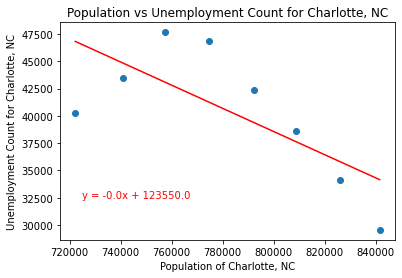

In [16]:
#Population vs Unemployment Count - CLT
df.dtypes
x_values = df["Population", "Charlotte city, North Carolina"]
x_values
y_values = df["Unemployment Count", "Charlotte city, North Carolina"]
y_values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(725000,32500), color="red")
plt.xlabel("Population of Charlotte, NC")
plt.ylabel("Unemployment Count for Charlotte, NC")
plt.title("Population vs Unemployment Count for Charlotte, NC")
plt.show()

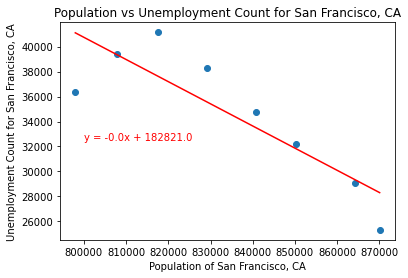

In [19]:
#Population vs Unemployment Count - SF
df.dtypes
x_values = df["Population", "San Francisco city, California"]
x_values
y_values = df["Unemployment Count", "San Francisco city, California"]
y_values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(800000,32500), color="red")
plt.xlabel("Population of San Francisco, CA")
plt.ylabel("Unemployment Count for San Francisco, CA")
plt.title("Population vs Unemployment Count for San Francisco, CA")
plt.show()

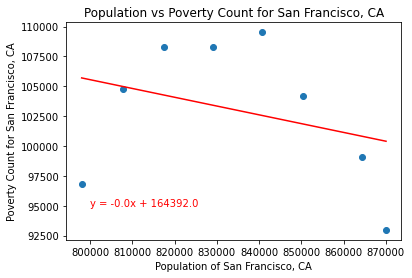

In [20]:
#Population vs Poverty Count - SF
x_values = df["Population", "San Francisco city, California"]
x_values
y_values = df["Poverty Count", "San Francisco city, California"]
y_values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(800000,95000), color="red")
plt.xlabel("Population of San Francisco, CA")
plt.ylabel("Poverty Count for San Francisco, CA")
plt.title("Population vs Poverty Count for San Francisco, CA")
plt.show()

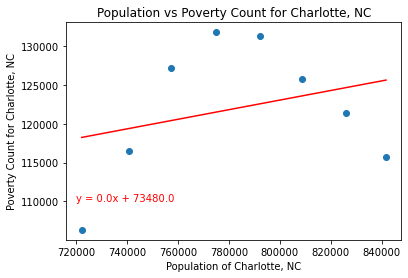

In [21]:
#Population vs Poverty Count - CLT
x_values = df["Population", "Charlotte city, North Carolina"]
x_values
y_values = df["Poverty Count", "Charlotte city, North Carolina"]
y_values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(720000,110000), color="red")
plt.xlabel("Population of Charlotte, NC")#Population vs Poverty Count - CLT
plt.ylabel("Poverty Count for Charlotte, NC")
plt.title("Population vs Poverty Count for Charlotte, NC")
plt.show()

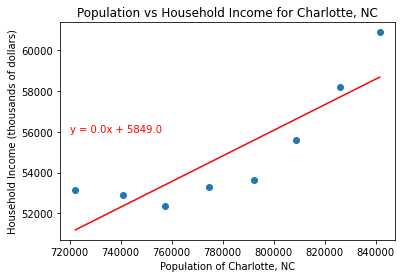

In [23]:
#Population vs Household Income - CLT
x_values = df["Population", "Charlotte city, North Carolina"]
x_values
y_values = df["Household Income", "Charlotte city, North Carolina"]
y_values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(720000,56000), color="red")
plt.xlabel("Population of Charlotte, NC")
plt.ylabel("Household Income (thousands of dollars)")
plt.title("Population vs Household Income for Charlotte, NC")
plt.show()

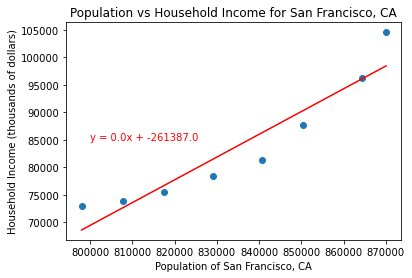

In [24]:
#Population vs Household Income - SF
x_values = df["Population", "San Francisco city, California"]
x_values
y_values = df["Household Income", "San Francisco city, California"]
y_values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(800000,85000), color="red")
plt.xlabel("Population of San Francisco, CA")
plt.ylabel("Household Income (thousands of dollars)")
plt.title("Population vs Household Income for San Francisco, CA")
plt.show()